## 전체 영양제 리뷰 전처리 시작

In [1]:
import pandas as pd

In [2]:
df_all=pd.read_csv('../datasets/reviews_data/all_product.csv')
df_all

,product_name,review_date,review_content,review_star,review_writer
0,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.03.19,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\r\n감마리놀렌산이 여성에게 ...,5.0,지오됴됴
1,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.07.05,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n두번째 구...,5.0,ju82**
2,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.20,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n유트브 보...,5.0,sns2**
3,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.19,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\r\n약이 좀 커...,4.0,gus1***
4,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.11.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n우선 약통 케이스도...,5.0,gksd******
...,...,...,...,...,...
90621,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.15,배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...,2.0,rkdg****
90622,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.07,배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...,2.0,macg****************
90623,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.06.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,rkdg****
90624,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.04.06,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요,5.0,채슨생


In [3]:
# df_all=df_all.drop(columns=['Unnamed: 0'])

### 불용어 처리 및 한글자 살리기 및 단어 치환, 

#### 전처리 필요한 파일들 가져오기

In [4]:
# 대체어
df_replace = pd.read_excel('../datasets/dic/replace_list.xlsx')
df_replace[:5]

,before_replacement,after_replacement
0,S헬스,삼성헬스
1,LG폰,스마트폰
2,LG V10,스마트폰
3,G7,스마트폰
4,GX,그룹운동


In [5]:
# 불용어 
df_stop = pd.read_excel('../datasets/dic/stopword_list.xlsx')
df_stop[:5]

,stopword
0,가까스로
1,가량
2,가령
3,가민
4,가민커넥트


In [6]:
# 한글자 살리기
df_oneword=pd.read_excel('../datasets/dic/one_char_list.xlsx')
df_oneword[:5]

,one_char_keyword
0,컵
1,방
2,물
3,돈
4,꿈


#### 전처리 시작 
- 1. 단어 치환 하기 
- 2. 불용어 처리 하기 
- 3. okt 이용해서 stemming 하기 _ 부사를 동사 원형으로 바꿔서 보기
<!-- mecab.pos로 토큰화하기 (.append(' '.join(token)) okt 하기  -->


In [7]:
## 단어 치환 함수 블로그 복사
def replace_word(review):
    for number in range(len(df_replace['before_replacement'])):
        try: 
            # 치환 단어만 데이터 치환
            if replace_list['before_replacement'][number] in review_content :
                review_content = review.replace(replace_list['before_replacement'][number], replace_list['after_replacement'][number])
        except: 
            pass
    return review
                

In [8]:
## 단어 치환 함수 블로그 복사
df_all['reveiw_replaced'] = ''
review_replaced_list = list()
for review in df_all['review_content']:
    review_replaced = replace_word(str(review))
    review_replaced_list.append(review_replaced)
df_all['reveiw_replaced'] = review_replaced_list
df_all[-10:]

,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced
90616,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.09.23,배송 빨라요 성능 보통이에요 유통기한 보통이에요\n제품 섭취한지 얼마되지않아.좋은지...,3.0,jong******,배송 빨라요 성능 보통이에요 유통기한 보통이에요\n제품 섭취한지 얼마되지않아.좋은지...
90617,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.03.03,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n아침마다 일어나는게 힘...,5.0,daph****,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n아침마다 일어나는게 힘...
90618,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.02.27,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n요즘 들어 기력이 떨어...,5.0,neti*****************,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\n요즘 들어 기력이 떨어...
90619,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.02.27,배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요\n지금까지 먹어본것중 아르기닌...,5.0,with*******,배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요\n지금까지 먹어본것중 아르기닌...
90620,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.08.09,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,jhi8**,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요
90621,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.15,배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...,2.0,rkdg****,배송 빨라요 성능 성능이 별로예요 유통기한 기한이 넉넉해요\n2박스 먹어봤으나 피로...
90622,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.07.07,배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...,2.0,macg****************,배송 빨라요 성능 성능이 별로예요 유통기한 보통이에요\n호불호가 있을지 모르겠지만 ...
90623,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.06.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,rkdg****,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요
90624,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.04.06,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요,5.0,채슨생,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요
90625,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.03.27,배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요,5.0,smcd***,배송 보통이에요 성능 성능이 뛰어나요 유통기한 보통이에요


In [9]:
# 내용의 토큰화 먼저_healthapp 복사
from mecab import MeCab
mecab = MeCab()
from konlpy.tag import Okt
okt = Okt()
stop=df_stop['stopword'].tolist()
oneword=df_oneword['one_char_keyword'].tolist()

In [10]:
# 불용어 제거 _ 블로그 및 chat
def stopword(text) :
    words = text.split() # text를 공백 기준으로 단어 분할한 뒤, 불용어 처리 진행 
    removed_words = [word for word in words if word not in stop]
    return ' '.join(removed_words)

In [11]:
## 불용어 처리 완료 
df_all['stopremoved_reviews']=df_all['reveiw_replaced'].apply(stopword)

In [12]:
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토큰화 결과를 담을 리스트 초기화
tokenized_reviews = []

# df_recovery['stopremoved_reviews'] 열의 각 텍스트에 대해 어구 추출 및 형태소 분석 수행
for review_text in df_all['stopremoved_reviews']:
    tokens = []
    try:
        # 어구 추출
        phrases = okt.phrases(review_text)
        
        # 추출된 어구에 대해 형태소 분석 및 원하는 품사(Noun, Verb, Adjective, Adverb, Exclamation, Determiner, Conjunction, Alpha) 선택
        for phrase in phrases:
            pos_result = okt.pos(phrase, norm=True, stem=True)
            for word, pos in pos_result:
                if pos in ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Conjunction']:
                    if len(word) > 1 or word in oneword:
                        tokens.append(word)
    except:
        pass
    tokenized_reviews.append(' '.join(tokens))

In [13]:
# tokenized_reviews를 df_recovery에 새로운 열로 추가
df_all['okt_reviews'] = tokenized_reviews

In [14]:
df_all['okt_reviews'][21769]

'성능 성능 성능 기한'

In [15]:
from collections import Counter

# 중복된 단어를 제거하는 함수 정의
def remove_duplicates(text):
    tokens = text.split()
    word_counts = Counter(tokens)
    unique_tokens = list(word_counts.keys())
    return ' '.join(unique_tokens)
# 중복된 단어를 제거한 결과를 새로운 열에 저장하고 기존 열을 덮어쓰려면 다음 코드를 사용할 수 있습니다.
df_all['okt_reviews'] = df_all['okt_reviews'].apply(remove_duplicates)

In [16]:
# df_recovery['replaced_review']=df_recovery['mecab_reviews']
df_all['replaced_review']=df_all['okt_reviews']

In [17]:
df_all.to_csv('../datasets/reviews_data/all_preprocess.csv')

In [18]:
# df_recovery['mecab_reviews']
df_all['replaced_review']

0        성능 기한 감마 리놀렌산 여성 다해 초록색 비교 브리 결정 함량 제조 과정 마음 구...
1        기한 포장 상태 두번째 구입 월경 증후군 효과 프로 정도 영향 다시 한번 주문 알약...
2        기한 포장 상태 유트브 구매 피부 염증 판매 답글 고객 브리 제품 건강 많다 도움 ...
3        기한 포장 상태 효과 판매 답글 고객 브리 제품 구매 건강 많다 도움 문의사항 있다...
4        성능 기한 케이스 달라 확인 배송 총알 알약 크기 작다 가로 길이 정도 이구 리뷰 ...
                               ...                        
90621                             성능 별로 기한 박스 피로 회복 안되다 느낌
90622                                      성능 별로 호불호 먹기 포기
90623                                                성능 기한
90624                                             성능 지인 선물
90625                                                   성능
Name: replaced_review, Length: 90626, dtype: object

In [19]:
# review_star 부정과 긍정 댓글 분리 
condition_positive = df_all['review_star'] > 3  # 긍정
condition_negative = df_all['review_star'] <= 3  # 부정

In [20]:
df_review_positive = df_all[condition_positive]
df_review_negative = df_all[condition_negative]

In [21]:
df_review_positive.to_csv('../datasets/reviews_data/re_all_preprocess_positive.csv')
df_review_negative.to_csv('../datasets/reviews_data/re_all_preprocess_negative.csv')

In [22]:
# 'mecab_reviews' 열의 모든 텍스트를 하나의 문자열로 결합
#combined_text = ' '.join(df_recovery['mecab_reviews'])
combined_text = ' '.join(df_all['okt_reviews'])

In [23]:
from wordcloud import WordCloud

In [24]:
from collections import Counter

#### 토큰화 리뷰 빈도 계산

###### 형태소의 빈도를 계산할때 

In [25]:
from collections import Counter

# 단어 빈도수 카운트
word_counts = Counter(combined_text.split())

In [26]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 단어 빈도수 딕셔너리를 WordCloud에 전달
wordcloud = WordCloud(font_path=font_path, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

In [27]:
wordcloud.words_

{'기한': 1.0,
 '성능': 0.9071184598664803,
 '가격': 0.3679164725974228,
 '구매': 0.31313072504269523,
 '포장': 0.2497477099829219,
 '제품': 0.23880220462661078,
 '효과': 0.208042229467474,
 '상태': 0.19882394038192827,
 '배송': 0.19241965533302283,
 '좋다': 0.15777829529576154,
 '복용': 0.156982611395746,
 '오메가': 0.1569049836981835,
 '건강': 0.14960798012730941,
 '하다': 0.13122962272938984,
 '주문': 0.12245769290482844,
 '구입': 0.11440381928272007,
 '먹기': 0.09528799875795683,
 '비타민': 0.09470579102623816,
 '양제': 0.08550690886508307,
 '도움': 0.08009237696009937,
 '먹다': 0.07822931221859959,
 '생각': 0.07760829063809968,
 '루테': 0.07578403974538116,
 '섭취': 0.07180562024530353,
 '상품': 0.06807949076230399,
 '항상': 0.06493556901102314,
 '크기': 0.06231563421828908,
 '성분': 0.058997050147492625,
 '보고': 0.057793820835274026,
 '유통': 0.057619158515758426,
 '후기': 0.056027790715727374,
 '하루': 0.05598897686694613,
 '종근당': 0.05437820214252445,
 '알약': 0.054009470579102624,
 '추천': 0.051544791181493556,
 '넘김': 0.05039978264244682,
 '피로': 

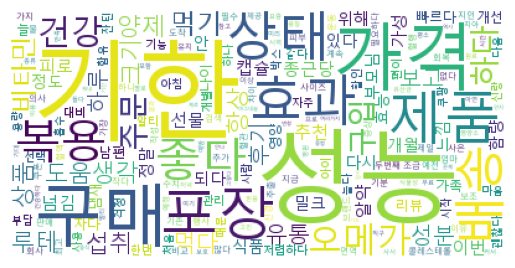

In [28]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

###### 문장을 합쳐서 계산할때 

In [29]:
# 단어로 쪼개기 
text_split = combined_text.split()

In [30]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'성능': 46742,
         '기한': 51528,
         '감마': 92,
         '리놀렌산': 80,
         '여성': 317,
         '다해': 382,
         '초록색': 38,
         '비교': 817,
         '브리': 113,
         '결정': 278,
         '함량': 1798,
         '제조': 288,
         '과정': 166,
         '마음': 1377,
         '구매': 16135,
         '효과': 10720,
         '알약': 2783,
         '개봉시': 12,
         '주의': 219,
         '껍질': 40,
         '제거': 146,
         '습관': 341,
         '하나': 1313,
         '얼른': 131,
         '양제': 4406,
         '실선': 1,
         '가위': 17,
         '가요': 81,
         '포장': 12869,
         '상태': 10245,
         '두번째': 819,
         '구입': 5895,
         '월경': 34,
         '증후군': 170,
         '프로': 623,
         '정도': 1958,
         '영향': 220,
         '다시': 1978,
         '한번': 1314,
         '주문': 6310,
         '크기': 3211,
         '편입': 219,
         '판매': 1022,
         '답글': 226,
         '고객': 213,
         '제품': 12305,
         '건강': 7709,
         '많다': 1007,
         '도움': 4

In [33]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(combined_text)

In [34]:
# count 
wordCloud.words_ 

{'성능 기한': 1.0,
 '기한 성능': 0.3118321402635128,
 '포장 상태': 0.2481325863678805,
 '기한 포장': 0.2167755991285403,
 '가격 가격': 0.13092644465193484,
 '효과': 0.07469654528478058,
 '상태 기한': 0.06945741259466749,
 '구매 성능': 0.06447764290901546,
 '제품': 0.05734516028633676,
 '좋다': 0.05552961925510945,
 '생각': 0.05527025625064841,
 '양제': 0.05420686793235813,
 '기한 배송': 0.05246913580246913,
 '복용': 0.04769685652038593,
 '섭취': 0.04746342981637099,
 '효과 성능': 0.04525884427845212,
 '주문': 0.04173150741778193,
 '배송 성능': 0.04152401701421309,
 '먹기': 0.03724452744060587,
 '정말': 0.03662205622989937,
 '구입': 0.035636476812947404,
 '하루': 0.03516962340491752,
 '도움': 0.034080298786181136,
 '성분': 0.03402842618528893,
 '비타민': 0.033976553584396725,
 '기한 오메가': 0.03283535636476813,
 '빠르다 배송': 0.03278348376387592,
 '효능': 0.032524120759414875,
 '피로': 0.03140885984023239,
 '정도': 0.02961925510945119,
 '개월': 0.027751841477331674,
 '제품 성능': 0.027570287374208944,
 '유통 기한': 0.027466542172424526,
 '하나': 0.026714389459487498,
 '있다': 0.02627

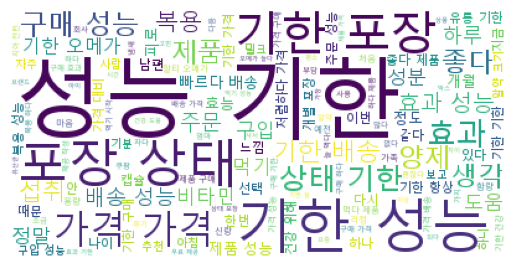

In [36]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

In [37]:
df_positive=pd.read_csv('../datasets/reviews_data/re_all_preprocess_positive.csv')
df_positive

,Unnamed: 0,product_name,review_date,review_content,review_star,review_writer,reveiw_replaced,stopremoved_reviews,okt_reviews,replaced_review
0,0,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.03.19,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\r\n감마리놀렌산이 여성에게 ...,5.0,지오됴됴,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\r\n감마리놀렌산이 여성에게 ...,빨라요 성능 기한이 넉넉해요 감마리놀렌산이 여성에게 좋다해서 초록색창에서 엄청 비교...,성능 기한 감마 리놀렌산 여성 다해 초록색 비교 브리 결정 함량 제조 과정 마음 구...,성능 기한 감마 리놀렌산 여성 다해 초록색 비교 브리 결정 함량 제조 과정 마음 구...
1,1,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.07.05,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n두번째 구...,5.0,ju82**,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n두번째 구...,기한이 넉넉해요 포장상태 포장이 깔끔해요 좋아요 두번째 구입입니다 .월경 증후군에 ...,기한 포장 상태 두번째 구입 월경 증후군 효과 프로 정도 영향 다시 한번 주문 알약...,기한 포장 상태 두번째 구입 월경 증후군 효과 프로 정도 영향 다시 한번 주문 알약...
2,2,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.20,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n유트브 보...,5.0,sns2**,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\r\n유트브 보...,기한이 넉넉해요 포장상태 포장이 깔끔해요 좋아요 유트브 구매하게 되었는데 피부 염증...,기한 포장 상태 유트브 구매 피부 염증 판매 답글 고객 브리 제품 건강 많다 도움 ...,기한 포장 상태 유트브 구매 피부 염증 판매 답글 고객 브리 제품 건강 많다 도움 ...
3,3,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2023.09.19,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\r\n약이 좀 커...,4.0,gus1***,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 보통이에요\r\n약이 좀 커...,기한이 넉넉해요 포장상태 포장이 깔끔해요 약이 커요. 효과는 아직 모르겠어요. 판매...,기한 포장 상태 효과 판매 답글 고객 브리 제품 구매 건강 많다 도움 문의사항 있다...,기한 포장 상태 효과 판매 답글 고객 브리 제품 구매 건강 많다 도움 문의사항 있다...
4,4,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,2021.11.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n우선 약통 케이스도...,5.0,gksd******,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요\r\n우선 약통 케이스도...,"빨라요 성능 성능이 뛰어나요 기한이 넉넉해요 약통 케이스도 보내달라고 했었는데, 금...",성능 기한 케이스 달라 확인 배송 총알 알약 크기 작다 가로 길이 정도 이구 리뷰 ...,성능 기한 케이스 달라 확인 배송 총알 알약 크기 작다 가로 길이 정도 이구 리뷰 ...
...,...,...,...,...,...,...,...,...,...,...
85800,90619,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.02.27,배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요\n지금까지 먹어본것중 아르기닌...,5.0,with*******,배송 빨라요 성능 성능이 뛰어나요 유통기한 보통이에요\n지금까지 먹어본것중 아르기닌...,빨라요 성능 성능이 뛰어나요 지금까지 먹어본것중 아르기닌 함량이 젤 높은것같아요 그...,성능 지금 아르기닌 함량 그래서 피로 회복 되다 느낌 아침 상큼 스타일,성능 지금 아르기닌 함량 그래서 피로 회복 되다 느낌 아침 상큼 스타일
85801,90620,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.08.09,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,jhi8**,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,빨라요 성능 성능이 뛰어나요 기한이 넉넉해요,성능 기한,성능 기한
85802,90623,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.06.16,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,5.0,rkdg****,배송 빨라요 성능 성능이 뛰어나요 유통기한 기한이 넉넉해요,빨라요 성능 성능이 뛰어나요 기한이 넉넉해요,성능 기한,성능 기한
85803,90624,푸드올로지 윤성빈PICK 에너지붐 /고함량 액상 아르기닌/ 피로회복,2022.04.06,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요,5.0,채슨생,배송 보통이에요 성능 보통이에요 유통기한 보통이에요\n지인 선물을줬는데 좋아했어요,성능 지인 선물을줬는데 좋아했어요,성능 지인 선물,성능 지인 선물


In [40]:
df_positive.isnull().sum()

Unnamed: 0                0
product_name              0
review_date               0
review_content            0
review_star               0
review_writer             0
reveiw_replaced           0
stopremoved_reviews      55
okt_reviews            1590
replaced_review        1590
dtype: int64

In [42]:
df_positive=df_positive.dropna()

In [43]:
df_positive.to_csv('../datasets/reviews_data/redrop_all_preprocess_positive.csv')

In [39]:
df_positive['replaced_review']

0        성능 기한 감마 리놀렌산 여성 다해 초록색 비교 브리 결정 함량 제조 과정 마음 구...
1        기한 포장 상태 두번째 구입 월경 증후군 효과 프로 정도 영향 다시 한번 주문 알약...
2        기한 포장 상태 유트브 구매 피부 염증 판매 답글 고객 브리 제품 건강 많다 도움 ...
3        기한 포장 상태 효과 판매 답글 고객 브리 제품 구매 건강 많다 도움 문의사항 있다...
4        성능 기한 케이스 달라 확인 배송 총알 알약 크기 작다 가로 길이 정도 이구 리뷰 ...
                               ...                        
85800              성능 지금 아르기닌 함량 그래서 피로 회복 되다 느낌 아침 상큼 스타일
85801                                                성능 기한
85802                                                성능 기한
85803                                             성능 지인 선물
85804                                                   성능
Name: replaced_review, Length: 85805, dtype: object

### 벡터화 진행